## Visualization of the quantitative results for the reproducability experiment

In [1]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
# Obtain predicted label from prediction file
def read_label(path):
    with open(path, 'r') as f:
        text = f.read()

    prediction = text.split(' ')
    if len(prediction) < 5:
        prediction = ' '.join(prediction[2:3])
    else:
            prediction = ' '.join(prediction[2:4])

    if prediction[-1] == ",":
        prediction = prediction[:-1]

    return prediction

In [3]:
# Function to plot the results
def plot_figures(selected_files, logdir):
    files = []
    for f in selected_files:
        files.append(os.path.join(f))
    N = len(files)

    N = len(selected_files)
    assert N > 1
    
    if len(selected_files) == 3:
        fig, axs = plt.subplots(N, 3, figsize=(15, 15), tight_layout=True)
    else: 
        fig, axs = plt.subplots(N, 3, figsize=(15, 11), tight_layout=True)

    # Visualize the chosen files 
    for i, file in enumerate(files):

        path = os.path.join(logdir, file)

        original = np.load(os.path.join(path, 'original_image.npy')).transpose(1, 2, 0)
        exp_CNX = np.load(os.path.join(path, 'exp_cartoonX.npy'))[0]
        exp_RDE = np.load(os.path.join(path, 'exp_pixelRDE.npy'))

        prediction = read_label(os.path.join(path, 'pred.txt'))

        axs[i][0].set_ylabel('Prediction\n' + prediction, fontsize=30)
        axs[i][0].imshow(original)
        axs[i][0].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

        axs[i][1].imshow(exp_CNX, cmap="copper")
        axs[i][1].axis('off')

        axs[i][2].imshow(exp_RDE, cmap="copper")
        axs[i][2].axis('off')

    axs[0][1].set_title(r'CartoonX $\lambda = 20$', fontsize=30)
    axs[0][2].set_title(r'PixelRDE $\lambda = 4$', fontsize=30)

    plt.show()

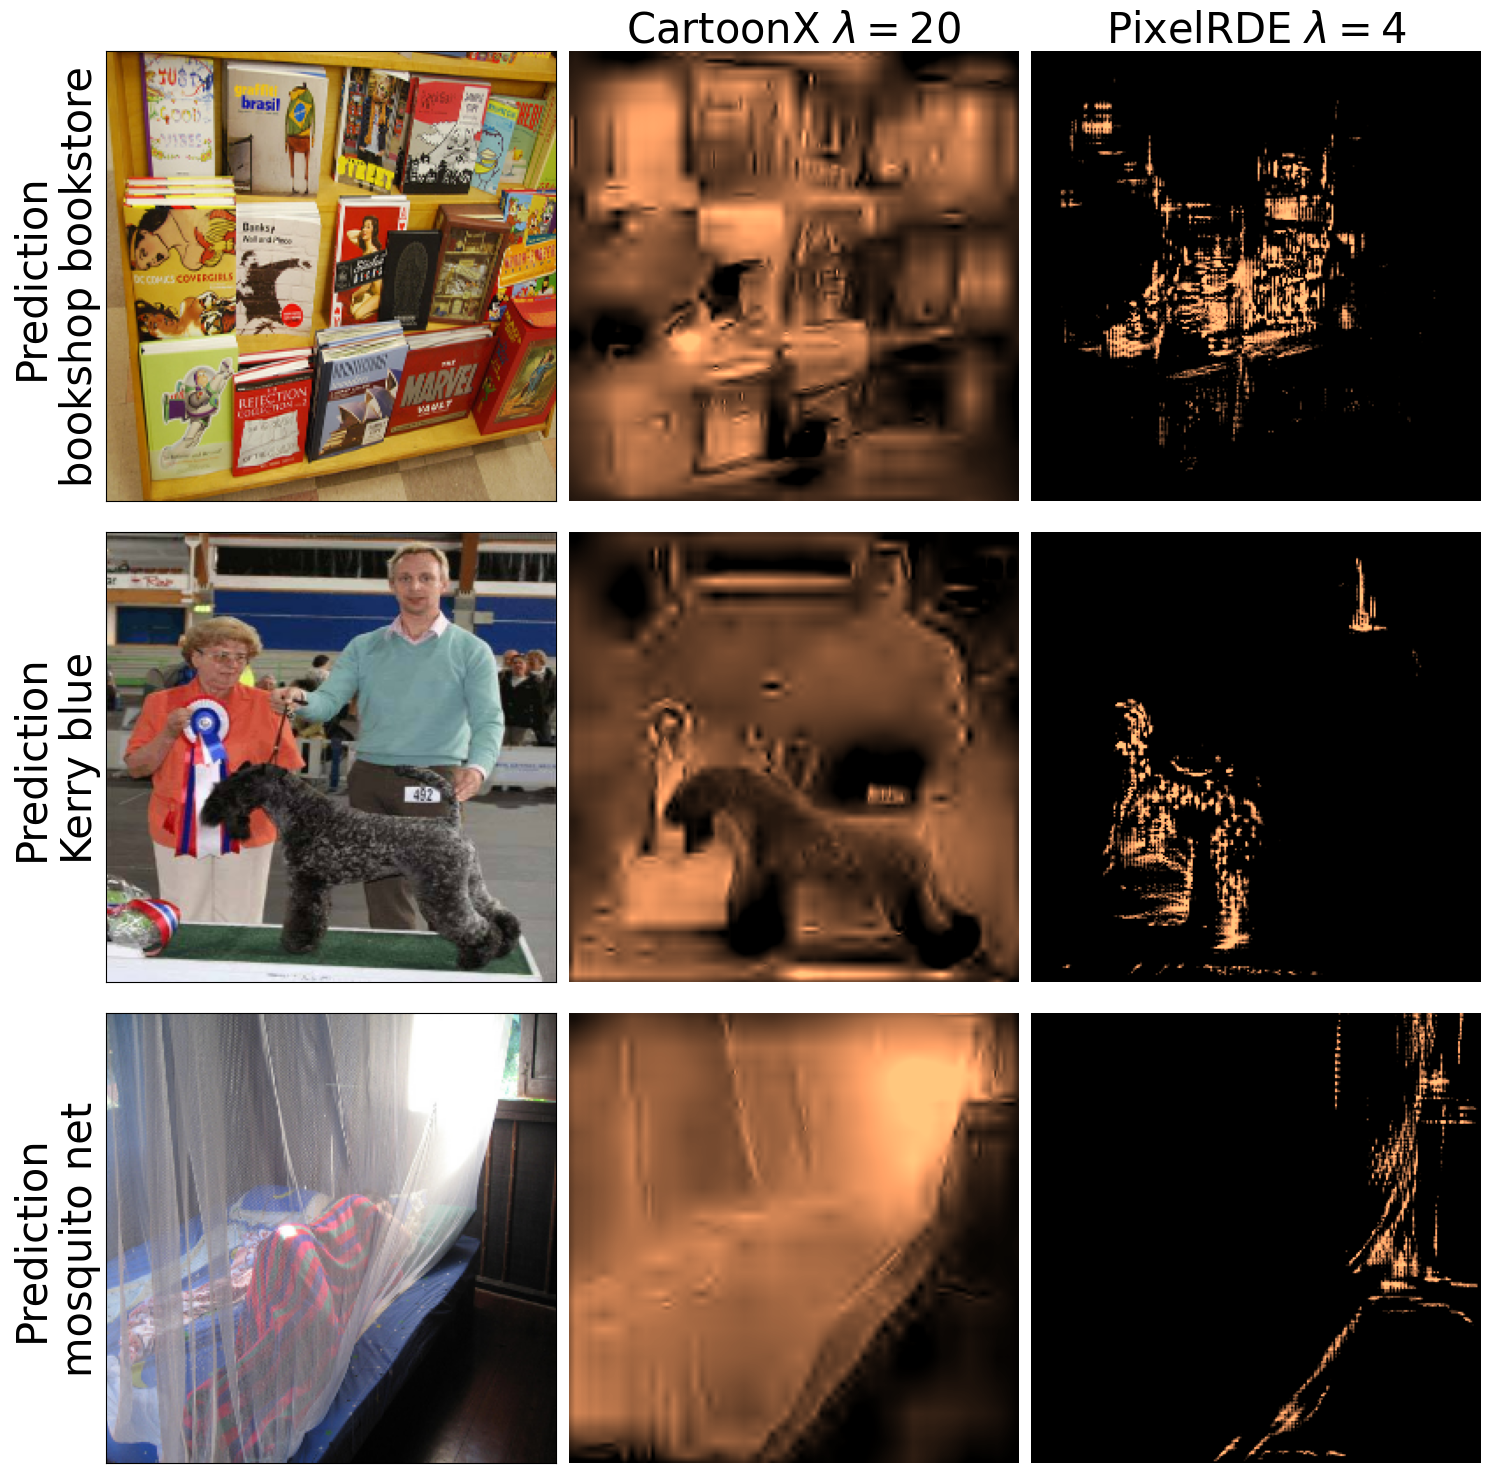

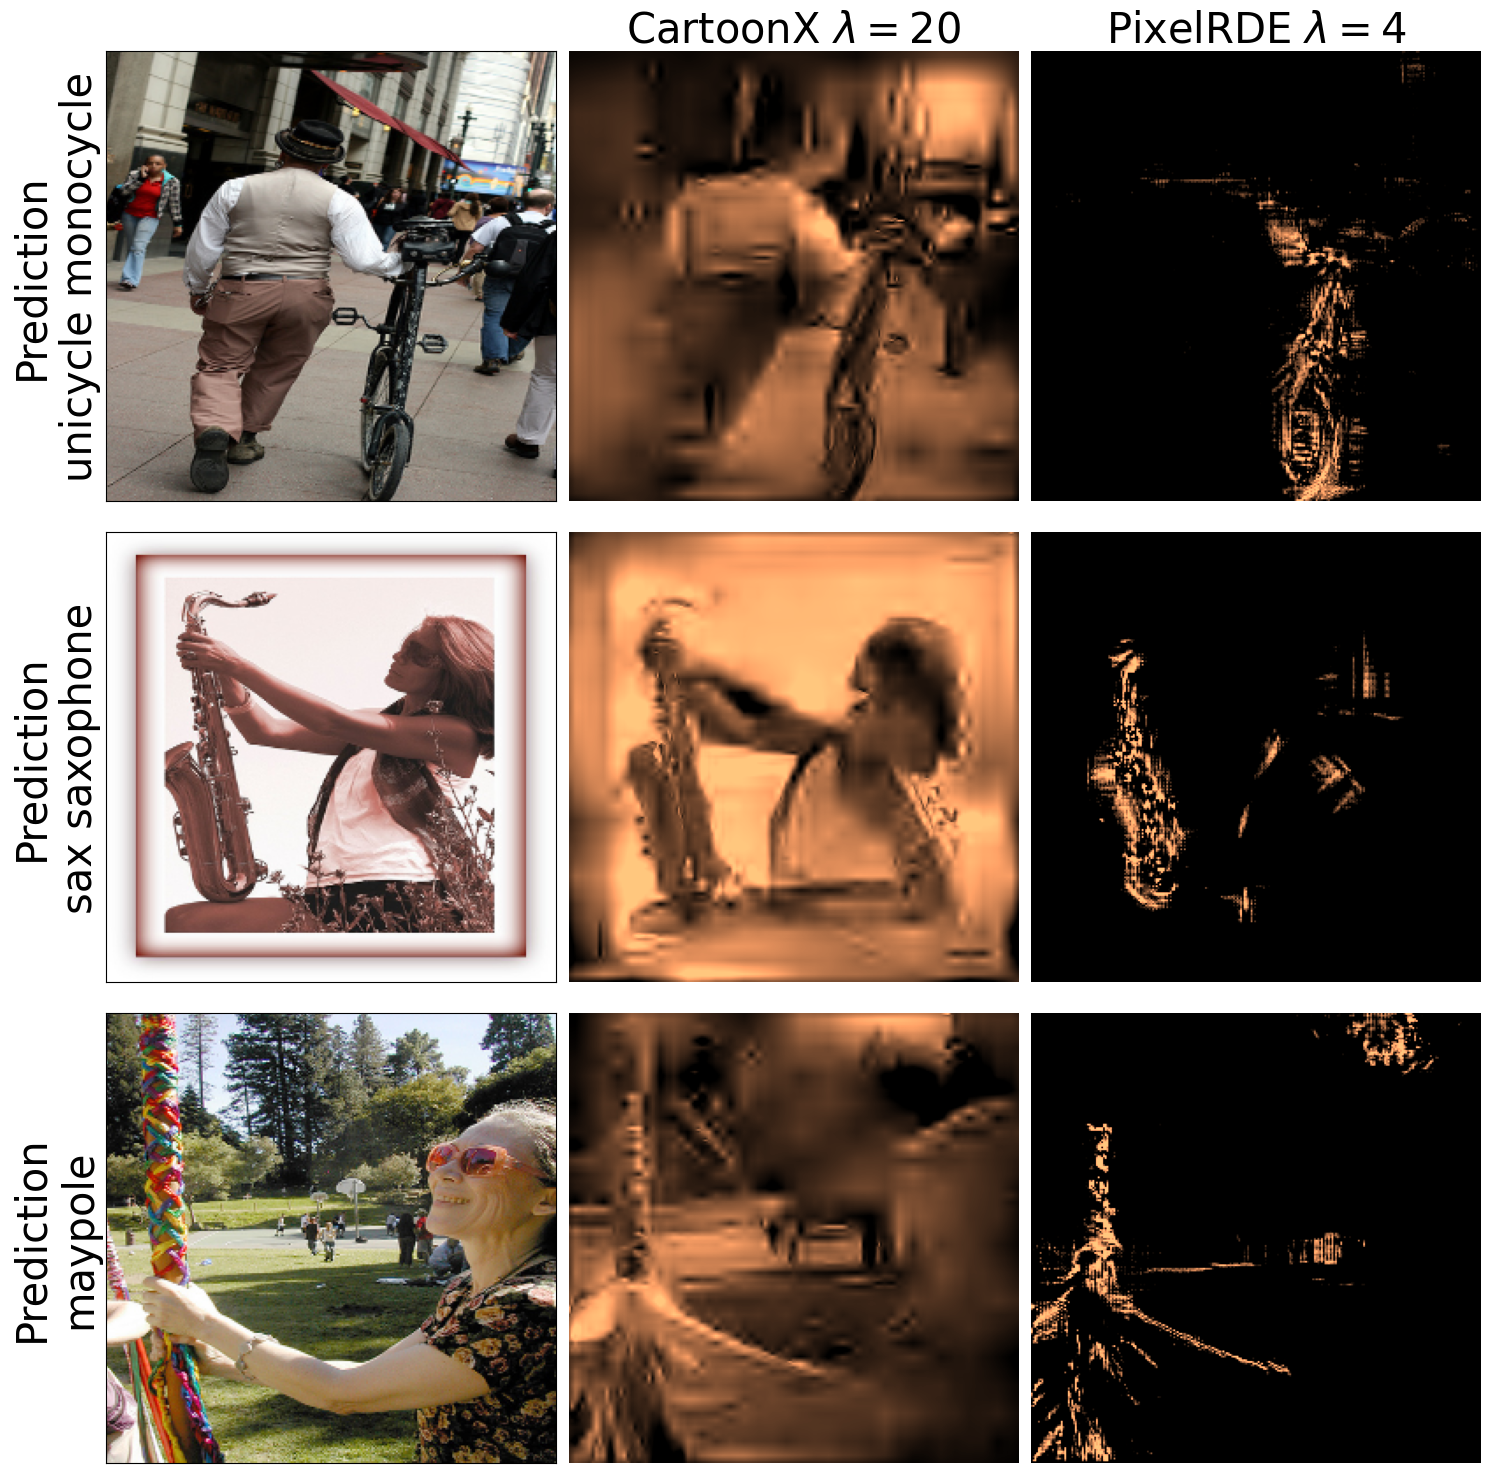

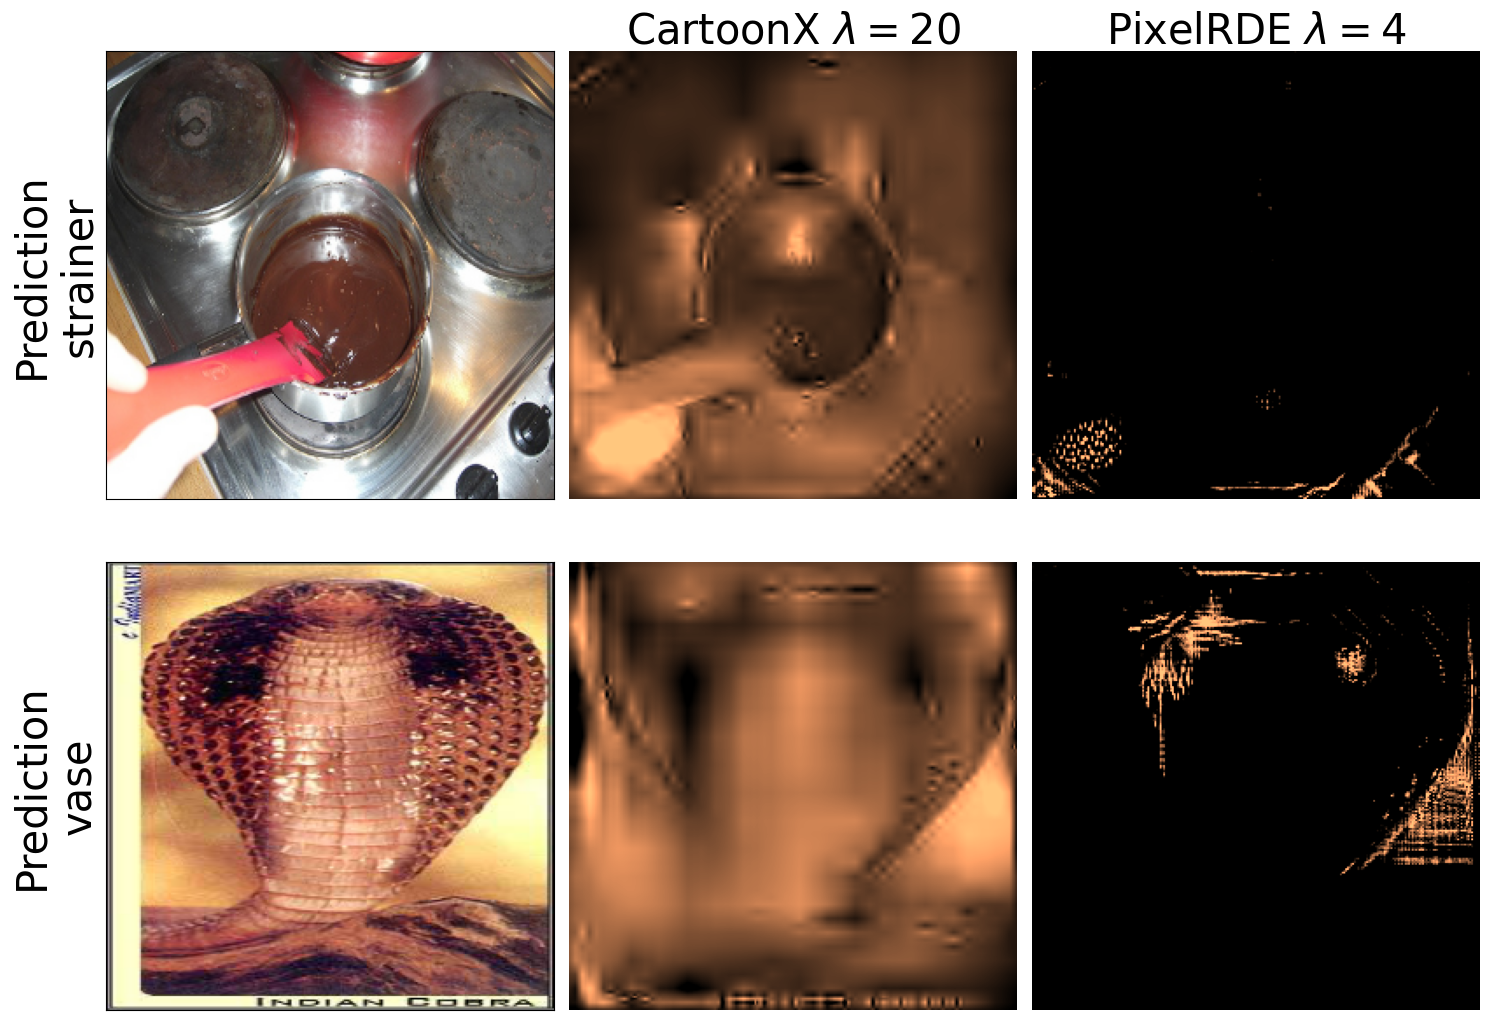

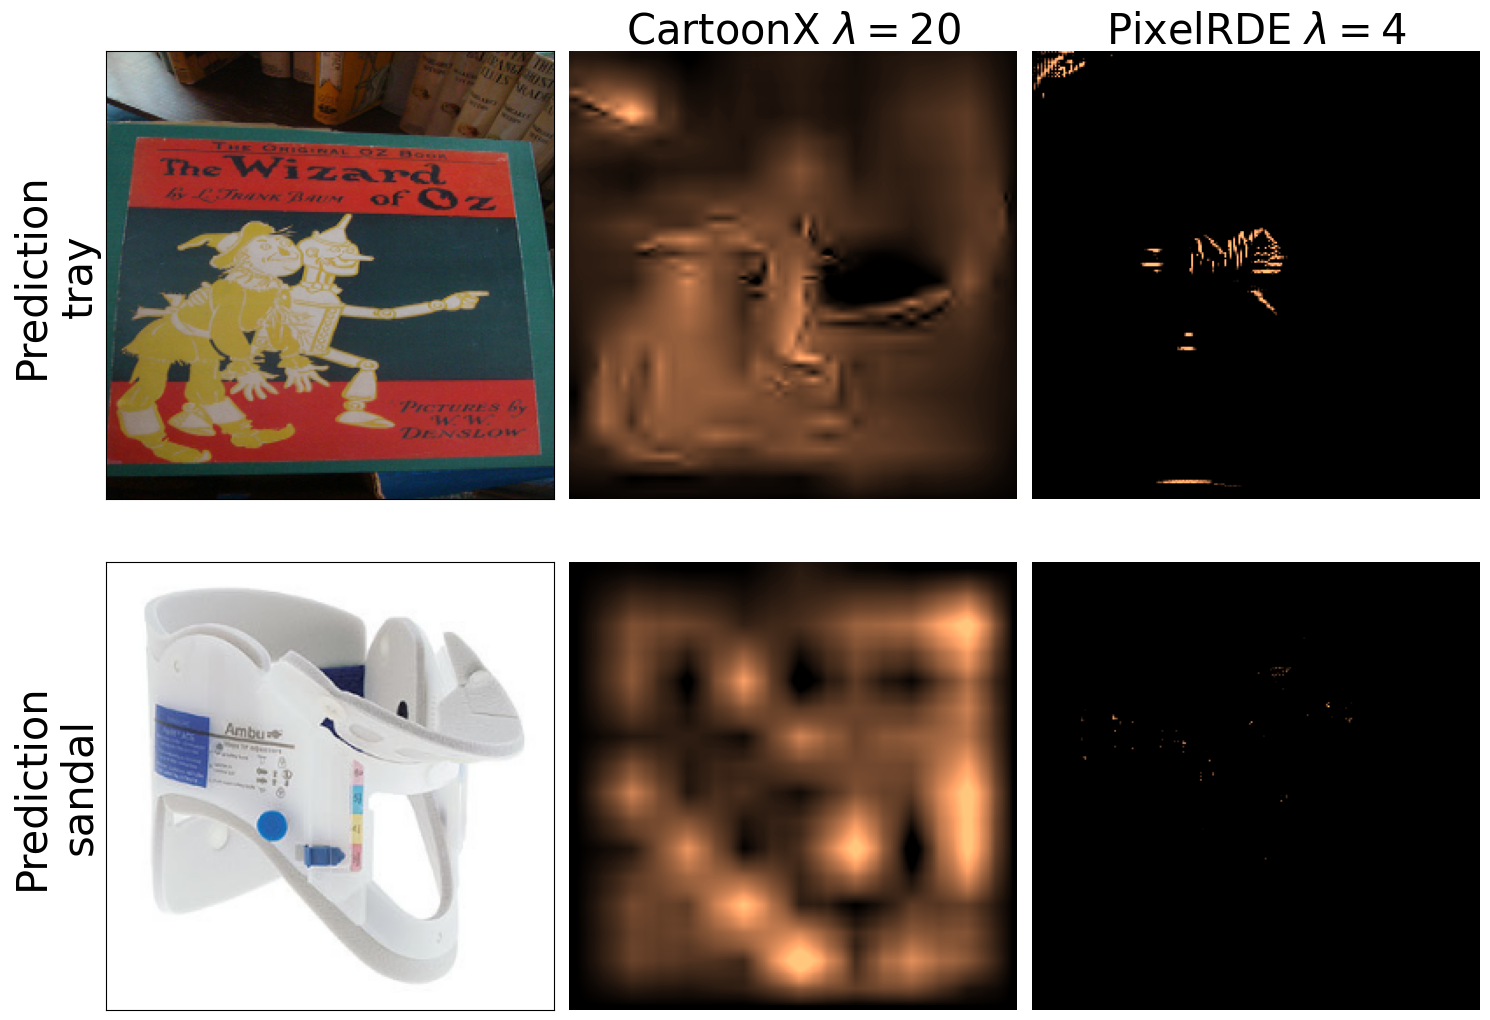

In [4]:
logdir = "../logs/experiment1"

# Files to reproduce Figure 1 (left and right) in the paper
selected_files_pos = [
    "n06596364_comic_bookCNX_l1lambda20_RDE_l1lambda4_masko",
    "n02093859_Kerry_blue_terrierCNX_l1lambda20_RDE_l1lambda4_masko",
    "n03788365_mosquito_netCNX_l1lambda20_RDE_l1lambda4_masko",
]

selected_files_neg = [
    "n04509417_unicycleCNX_l1lambda20_RDE_l1lambda4_masko",
    "n04141076_saxCNX_l1lambda20_RDE_l1lambda4_masko",
    "n03733131_maypoleCNX_l1lambda20_RDE_l1lambda4_masko",
]

# Files to reproduce Figure 2 (left and right) in the paper
model_bad_x_good = [
    "n07836838_chocolate_sauceCNX_l1lambda20_RDE_l1lambda4_masko",
    "n01748264_Indian_cobraCNX_l1lambda20_RDE_l1lambda4_masko",
]

model_bad_x_bad = [
    "n07248320_book_jacketCNX_l1lambda20_RDE_l1lambda4_masko",
    "n03814639_neck_braceCNX_l1lambda20_RDE_l1lambda4_masko",
]

figures = []
figures.append(selected_files_pos)
figures.append(selected_files_neg)
figures.append(model_bad_x_good)
figures.append(model_bad_x_bad)

for figure in figures:
    plot_figures(figure, logdir)

Text(0.5, 1.0, 'PixelRDE $\\lambda = 4$')

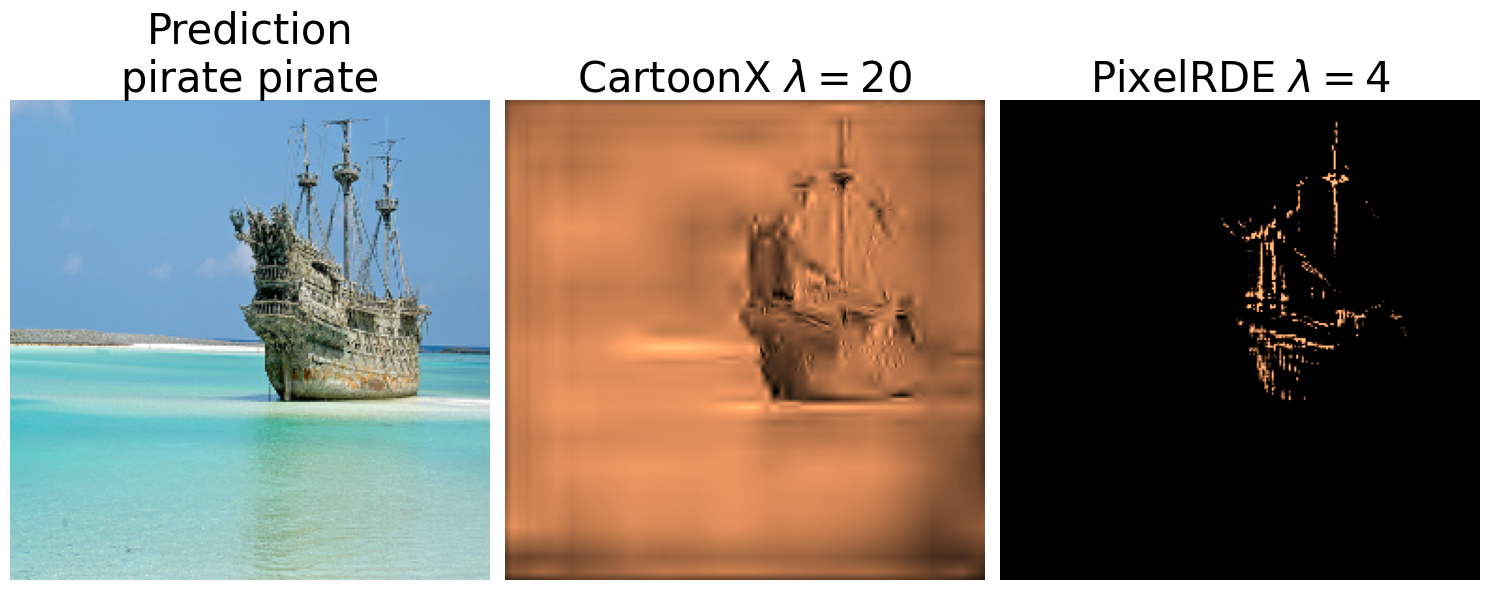

In [5]:
# Additional example
fig, axs = plt.subplots(1, 3, figsize=(15, 15), tight_layout=True)

path = os.path.join(logdir, "n03947888_pirateCNX_l1lambda20_RDE_l1lambda4_masko")

original = np.load(os.path.join(path, 'original_image.npy')).transpose(1, 2, 0)
exp_CNX = np.load(os.path.join(path, 'exp_cartoonX.npy'))[0]
exp_RDE = np.load(os.path.join(path, 'exp_pixelRDE.npy'))

prediction = read_label(os.path.join(path, 'pred.txt'))

axs[0].imshow(original, cmap="copper")
axs[0].axis('off')
axs[0].set_title('Prediction\n' + prediction, fontsize=30)
axs[1].imshow(exp_CNX, cmap="copper")
axs[1].axis('off')
axs[1].set_title(r'CartoonX $\lambda = 20$', fontsize=30)
axs[2].imshow(exp_RDE, cmap="copper")
axs[2].axis('off')
axs[2].set_title(r'PixelRDE $\lambda = 4$', fontsize=30)